# Test autoFRK

**Title**: Test autoFRK Functionality

**Author**: Hsu, Yao-Chih

**Reviewer**: Xie, Yi-Xuan

**Version**: 1141018

**Description**: This script tests the autoFRK python version in different scenarios.

**Reference**: Resolution Adaptive Fixed Rank Kringing by ShengLi Tzeng & Hsin-Cheng Huang

## Install our python autoFRK

In [1]:
import sys
import numpy as np
import torch
print("=" * 50)
print("Python Environment Info")
print("=" * 50)
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version.split()[0]}")
print()

print("=" * 50)
print("Package Locations")
print("=" * 50)
print(f"Torch location: {torch.__file__}")
print(f"NumPy location: {np.__file__}")
print()

print("=" * 50)
print("PyTorch Info")
print("=" * 50)
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA build: {torch.version.cuda}")
print()

print("=" * 50)
print("Test PyTorch Computation")
print("=" * 50)
x = torch.rand(3, 3)
print(f"Random tensor:\n{x}")
print(f"Sum: {x.sum().item():.4f}")

Python Environment Info
Python executable: d:\ProgramData\miniconda3\python.exe
Python version: 3.12.8

Package Locations
Torch location: C:\Users\user\AppData\Roaming\Python\Python312\site-packages\torch\__init__.py
NumPy location: C:\Users\user\AppData\Roaming\Python\Python312\site-packages\numpy\__init__.py

PyTorch Info
PyTorch version: 2.8.0+cpu
CUDA available: False
CUDA build: None

Test PyTorch Computation
Random tensor:
tensor([[0.6712, 0.7775, 0.3165],
        [0.8103, 0.3493, 0.7739],
        [0.4414, 0.4363, 0.1379]])
Sum: 4.7142


In [2]:
# install autoFRK in development mode
import os
import sys
module_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

!"{sys.executable}" -m pip uninstall -y autoFRK
!"{sys.executable}" -m pip install --upgrade pip build setuptools wheel matplotlib
!"{sys.executable}" -m build {module_root}
!"{sys.executable}" -m pip install -e "{module_root}"

Found existing installation: autoFRK 0.1.0
Uninstalling autoFRK-0.1.0:
  Successfully uninstalled autoFRK-0.1.0
Defaulting to user installation because normal site-packages is not writeable
* Creating isolated environment: venv+pip...
* Installing packages in isolated environment:
  - setuptools>=61.0
  - wheel
* Getting build dependencies for sdist...
running egg_info
writing src\autoFRK.egg-info\PKG-INFO
writing dependency_links to src\autoFRK.egg-info\dependency_links.txt
writing requirements to src\autoFRK.egg-info\requires.txt
writing top-level names to src\autoFRK.egg-info\top_level.txt
reading manifest file 'src\autoFRK.egg-info\SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
writing manifest file 'src\autoFRK.egg-info\SOURCES.txt'
* Building sdist...
running sdist
running egg_info
writing src\autoFRK.egg-info\PKG-INFO
writing dependency_links to src\autoFRK.egg-info\dependency_links.txt
writing requirements to src\autoFRK.egg-info\requires.txt

C:\Users\user\AppData\Local\Temp\build-env-ewhtfj8z\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
!!

        ********************************************************************************
        Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).

        By 2026-Feb-18, you need to update your project and remove deprecated calls
        or your builds will no longer be supported.

        See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
        ********************************************************************************

!!
  corresp(dist, value, root_dir)
C:\Users\user\AppData\Local\Temp\build-env-ewhtfj8z\Lib\site-packages\setuptools\config\_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a 

Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///C:/Users/user/Desktop/github/autoFRK-python
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for autoFRK (pyproject.toml): started
  Building editable for autoFRK (pyproject.toml): finished with status 'done'
  Created wheel for autoFRK: filename=autofrk-0.1.0-0.editable-py3-none-any.whl size=26827 sha256=1614ce738460311466d339170e929e4488d367b03e904c8ce711df31ea2678ba
  Stored in directory: C:\Users\user\AppData\Local\Temp\pip-ephem

## Import modules

In [3]:
# import modules
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from autoFRK import AutoFRK
from autoFRK.utils.utils import to_tensor

## Load data

In [4]:
# load data
datasets_path = f'test datasets/matrixForTest'
data = pd.read_csv(os.path.join(datasets_path, 'matrixForTest_data.csv'))
locs = pd.read_csv(os.path.join(datasets_path, 'matrixForTest_locs.csv'))

In [5]:
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-0.652166,-5.366158,3.143780,3.798089,-7.997662,1.136705,0.960326,3.201232,1.992290,2.001078,...,-0.448844,-0.577043,1.269652,0.347800,-3.742630,2.661689,-0.436828,-3.561380,-2.566957,3.640283
1,-0.816321,-6.481439,2.749028,0.729822,-4.332897,-2.829327,5.146832,-2.724882,3.281578,-0.628886,...,-3.152476,-0.342614,7.929967,-2.177937,0.556117,-2.043759,4.111130,-5.352733,1.529268,-1.917891
2,-4.549512,-7.763640,-1.872094,2.033659,-5.619806,-2.764594,6.608074,-1.398568,0.612283,-2.144521,...,-11.434087,3.868390,5.407404,7.577723,-6.269609,-1.125877,-13.487372,-0.227024,-2.769120,12.927128
3,-5.870963,-5.904798,-0.655968,7.860149,2.625713,-3.847751,7.439885,2.407433,3.273375,2.692631,...,-7.528925,6.847024,7.220447,4.332599,-3.998274,2.552754,-10.645833,3.684432,0.137623,7.370367
4,-6.552938,-8.789871,0.440326,6.932291,-0.442761,-4.145054,5.732851,0.655010,0.159350,-3.153300,...,-8.633517,4.540188,1.572350,7.350779,-3.499281,-0.169003,-10.041218,1.220481,-3.726887,8.765699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.790659,0.130805,5.131183,-2.309486,-4.404798,5.305249,1.197340,-0.427687,1.653997,4.622978,...,-0.952464,4.506945,-0.397343,-4.158340,0.220648,-1.642949,10.328322,-4.605859,1.894557,2.241329
96,1.685645,1.215962,3.793043,-3.899476,-1.595553,1.209884,-0.674625,-3.748975,-2.862852,1.977467,...,3.481229,0.753463,-4.839027,-5.032350,3.904153,6.617573,6.643477,3.399834,-1.562913,-2.786618
97,-1.395409,-3.042111,1.776225,-0.018072,-8.091349,-0.487496,-5.728769,0.954178,-1.206207,4.115169,...,-0.294438,1.971506,0.779557,-3.610582,2.661466,4.502825,2.828657,-1.532787,5.843775,3.382403
98,-4.765434,-4.096297,-6.376321,3.124180,10.963501,-6.188876,4.604844,4.612062,-2.310631,-7.859488,...,-4.794723,1.663460,3.688412,12.393074,-7.103671,-0.586811,-14.112674,6.708079,-2.698385,7.515730


In [6]:
locs

,Var1,Var2
0,0.310345,0.551724
1,0.517241,0.827586
2,0.413793,0.103448
3,0.517241,0.344828
4,0.689655,0.034483
...,...,...
95,0.275862,0.655172
96,0.344828,0.862069
97,0.379310,0.758621
98,0.620690,0.241379


## Convert data to tensor

In [7]:
# convert to tensor
data = to_tensor(data.to_numpy())
locs = to_tensor(locs.to_numpy())

## Test on known locations

In [8]:
model = AutoFRK()
model.forward(
    data=data,
    loc=locs
)

2025-10-18 11:16:58 - autoFRK.utils.logger - WARNING: Parameter "device" was not set. Value "cpu" detected and used.
2025-10-18 11:16:58 - autoFRK.utils.logger - INFO: Successfully using device "cpu".
2025-10-18 11:16:58 - autoFRK.utils.logger - INFO: Successfully using device "cpu".


{'M': tensor([[ 7.1395e+00,  5.1027e+00, -4.6409e+00,  ..., -1.6017e-01,
          -7.9489e-03, -5.3018e-02],
         [ 5.1027e+00,  3.7313e+00, -3.3570e+00,  ..., -1.0528e-01,
          -6.6983e-03, -2.2702e-02],
         [-4.6409e+00, -3.3570e+00,  3.1845e+00,  ...,  7.9533e-02,
           2.5039e-02,  3.0511e-02],
         ...,
         [-1.6017e-01, -1.0528e-01,  7.9533e-02,  ...,  4.7364e-02,
          -8.2130e-03, -1.1569e-03],
         [-7.9489e-03, -6.6983e-03,  2.5039e-02,  ..., -8.2130e-03,
           4.1754e-02,  1.9213e-03],
         [-5.3018e-02, -2.2702e-02,  3.0511e-02,  ..., -1.1569e-03,
           1.9213e-03,  4.8314e-02]], dtype=torch.float64),
 's': tensor(0.2810, dtype=torch.float64),
 'negloglik': tensor(8485.9507, dtype=torch.float64),
 'w': tensor([[-1.5136, -1.8858, -0.2411,  ...,  0.1136, -0.6498,  3.4300],
         [-0.7637, -1.6535,  0.1616,  ...,  0.2710, -0.5289,  1.9121],
         [ 1.7557,  1.0532,  1.2741,  ..., -0.0732,  0.9582, -2.0735],
         ...,

In [9]:
pred = model.predict()

In [10]:
import torch.nn.functional as F

F.mse_loss(pred['pred.value'], data).item()

11.853958750986285

```r
> options(digits = 15)
> print(mse)
[1] 11.8539587159961 # R mse result
```

tensor(7.9766, dtype=torch.float64)


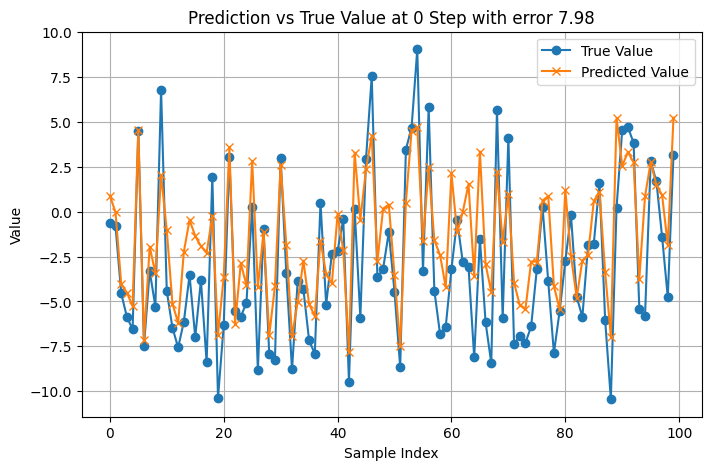

tensor(12.0117, dtype=torch.float64)


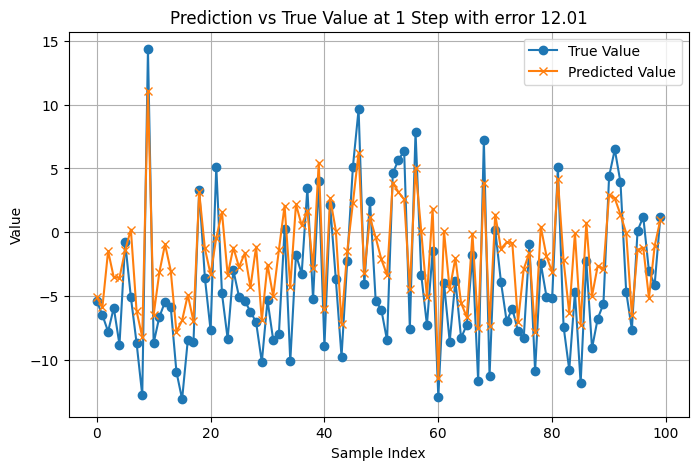

tensor(8.0081, dtype=torch.float64)


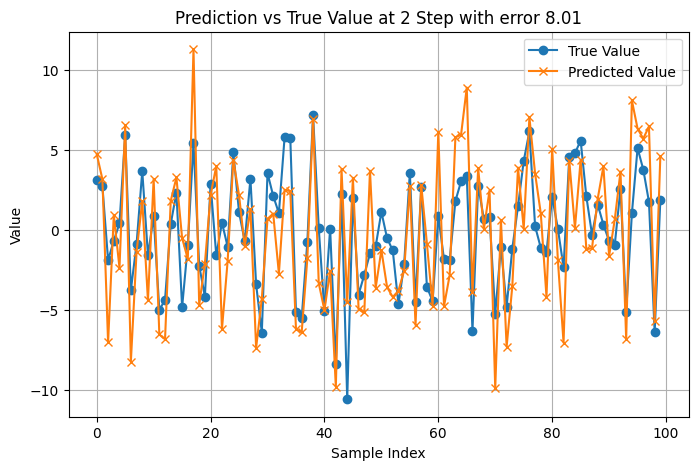

tensor(3.5373, dtype=torch.float64)


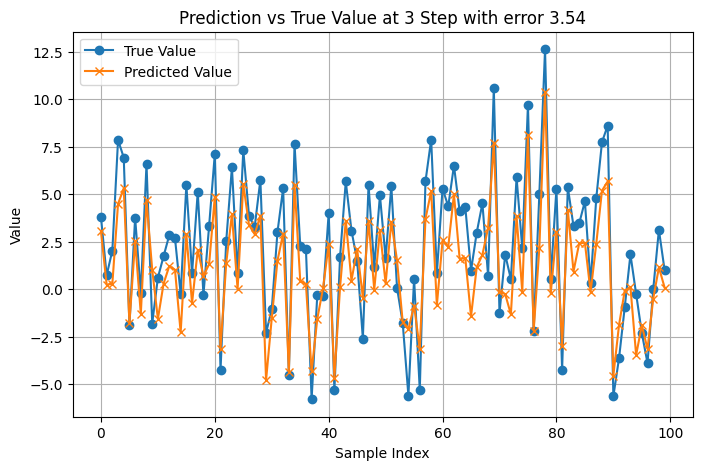

tensor(13.8529, dtype=torch.float64)


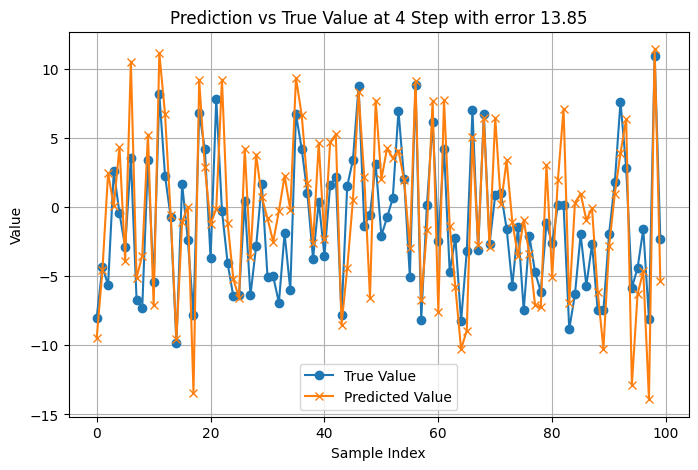

tensor(1.7859, dtype=torch.float64)


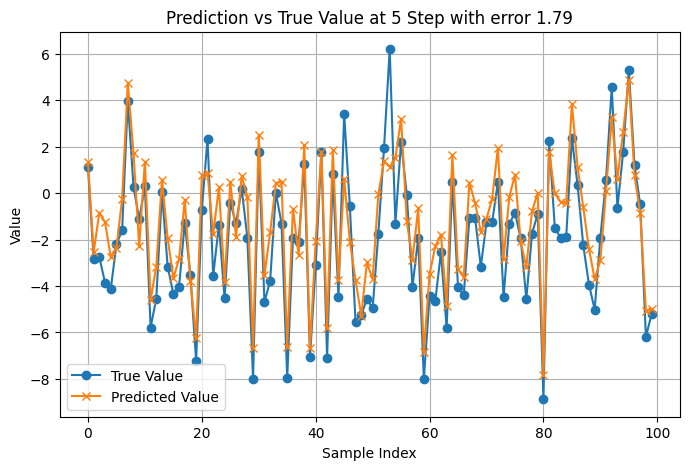

tensor(9.8860, dtype=torch.float64)


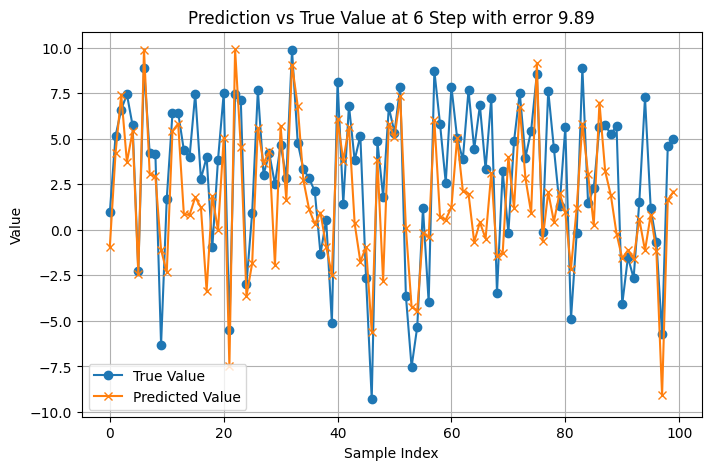

tensor(30.0424, dtype=torch.float64)


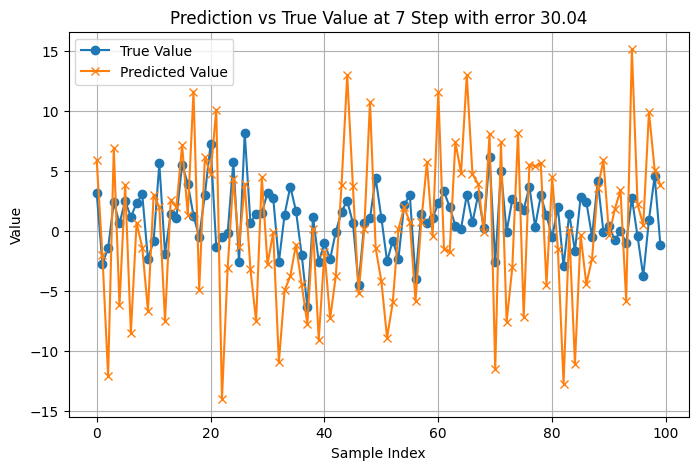

tensor(27.0730, dtype=torch.float64)


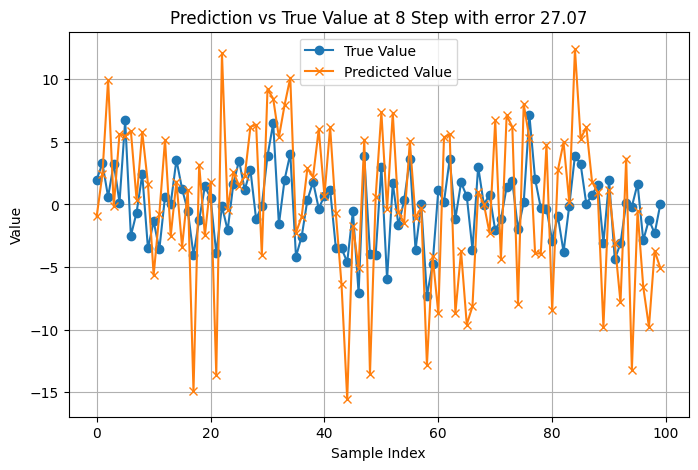

tensor(0.2160, dtype=torch.float64)


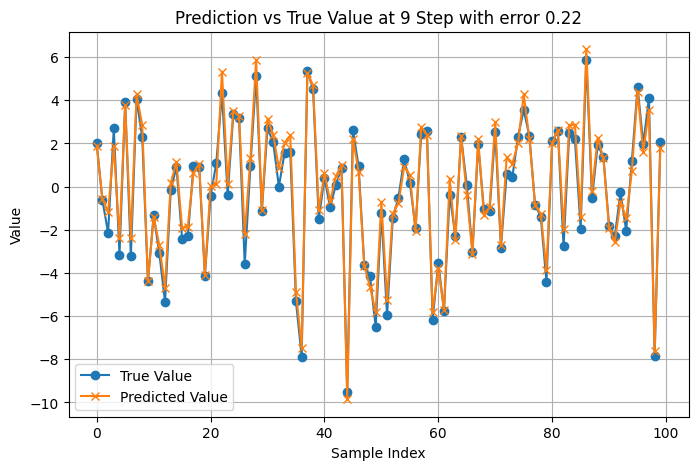

tensor(0.0753, dtype=torch.float64)


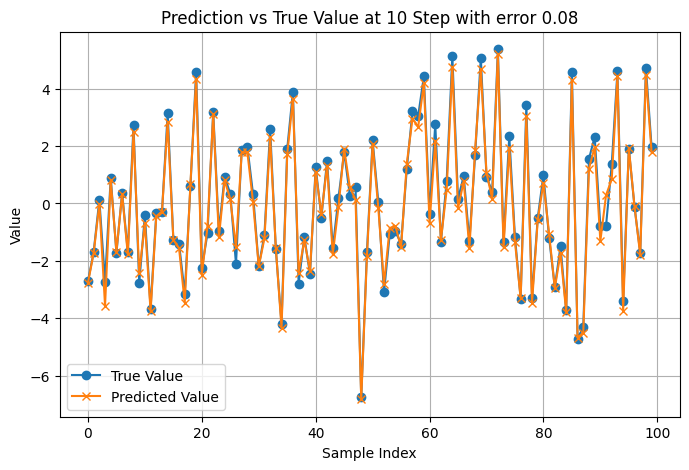

tensor(5.8888, dtype=torch.float64)


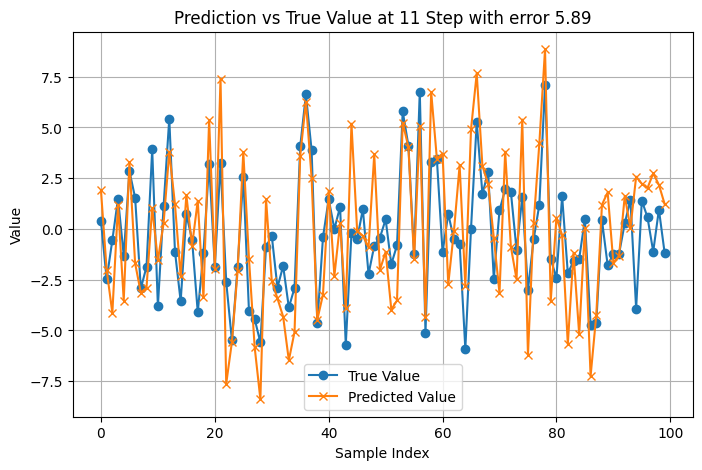

tensor(12.5987, dtype=torch.float64)


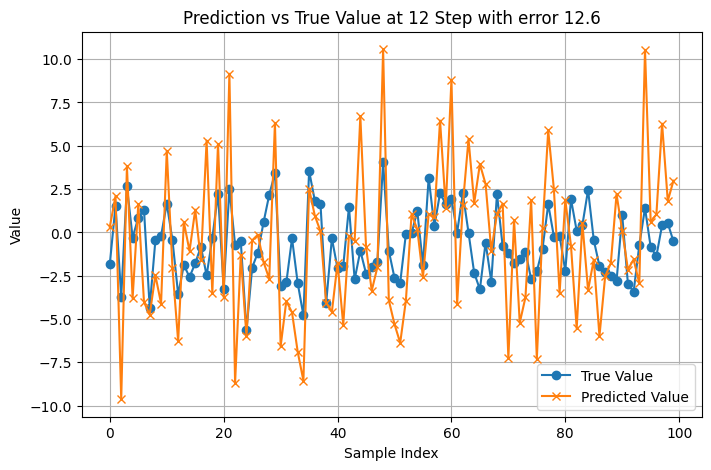

tensor(11.4932, dtype=torch.float64)


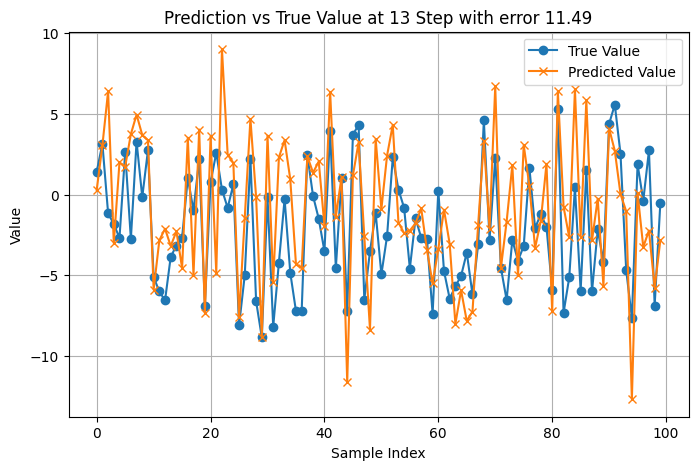

tensor(37.7534, dtype=torch.float64)


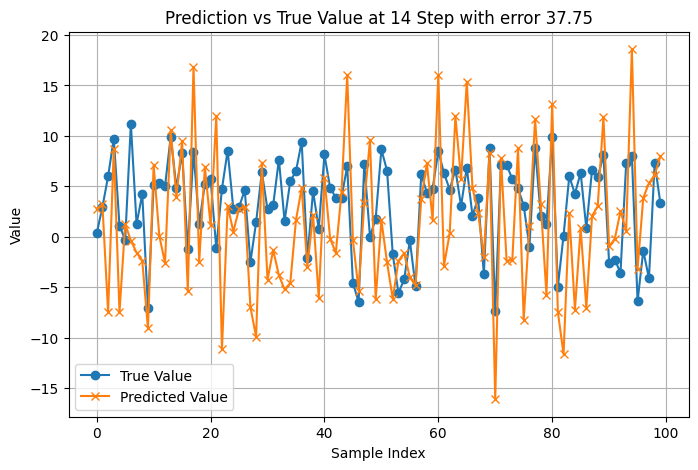

tensor(1.7492, dtype=torch.float64)


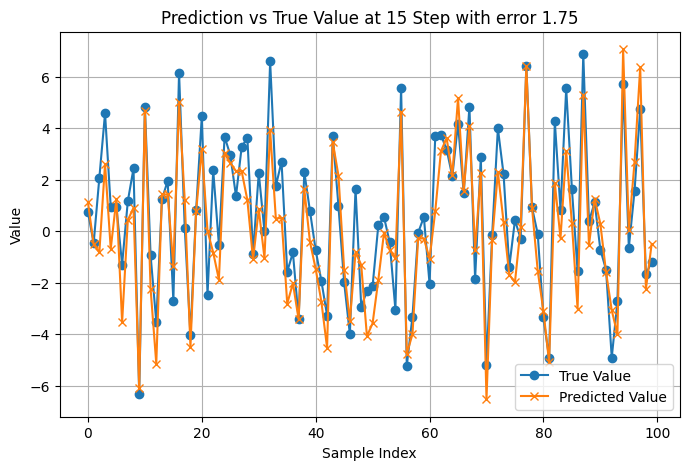

tensor(4.2474, dtype=torch.float64)


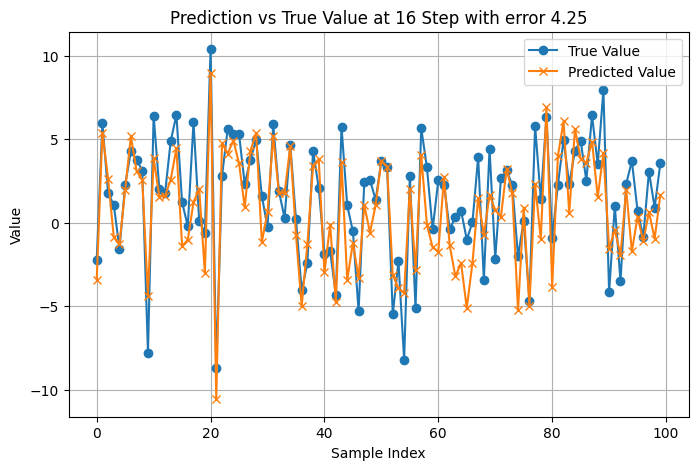

tensor(6.6476, dtype=torch.float64)


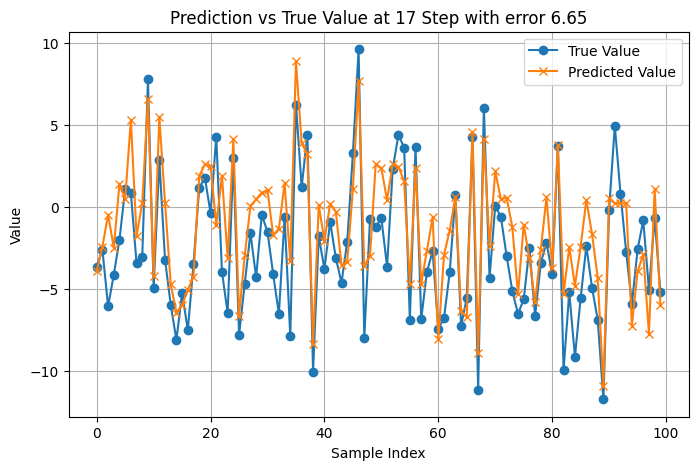

tensor(4.3365, dtype=torch.float64)


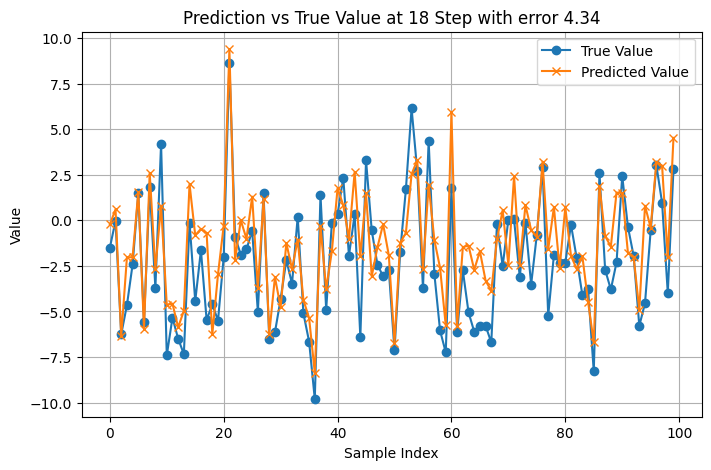

tensor(5.5149, dtype=torch.float64)


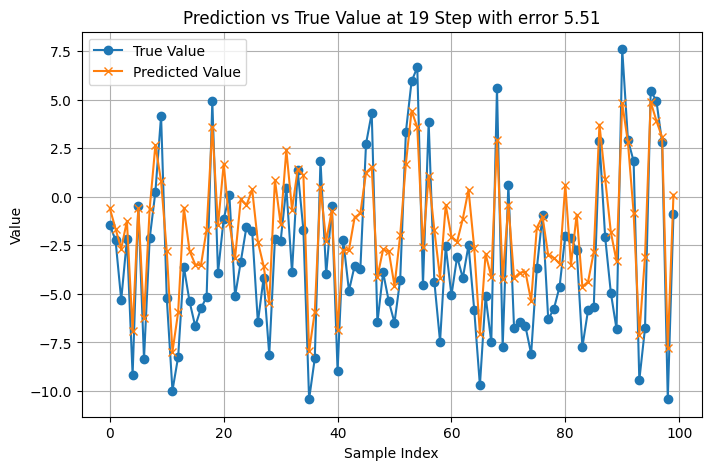

tensor(23.4937, dtype=torch.float64)


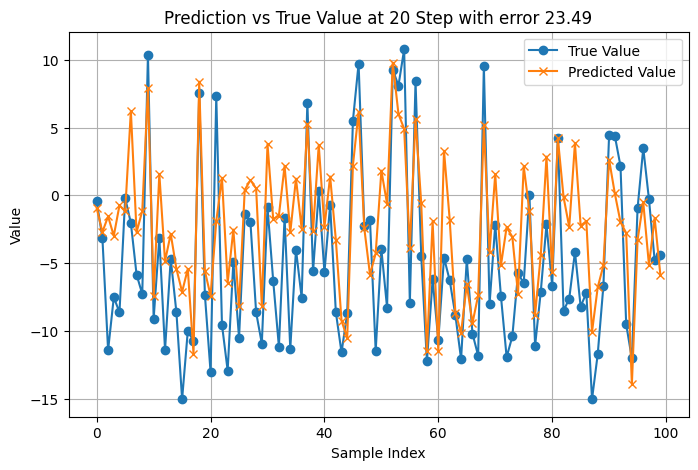

tensor(5.3613, dtype=torch.float64)


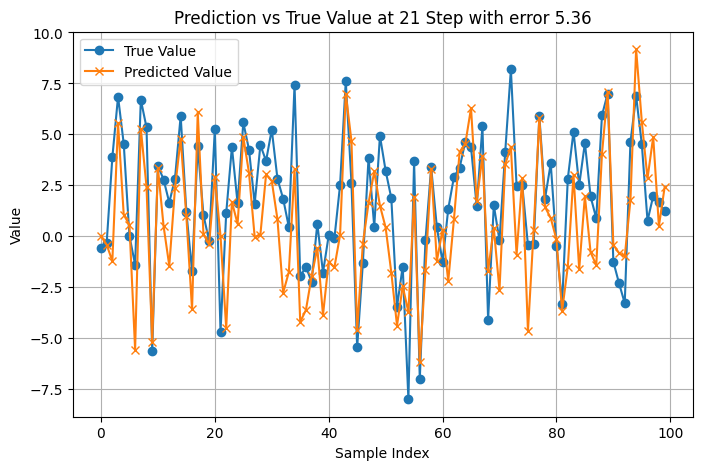

tensor(10.3640, dtype=torch.float64)


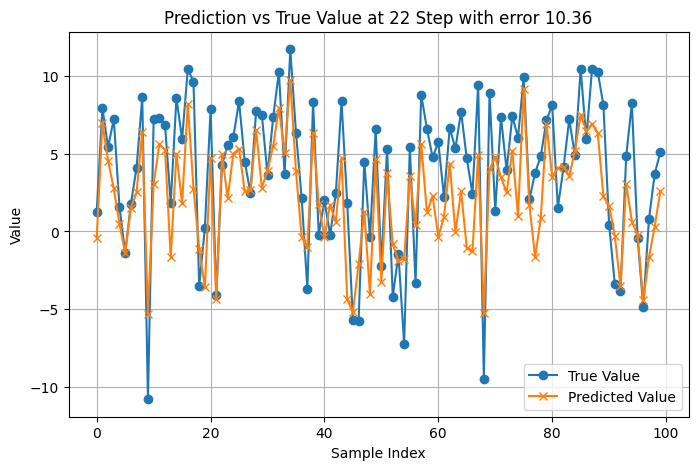

tensor(22.0651, dtype=torch.float64)


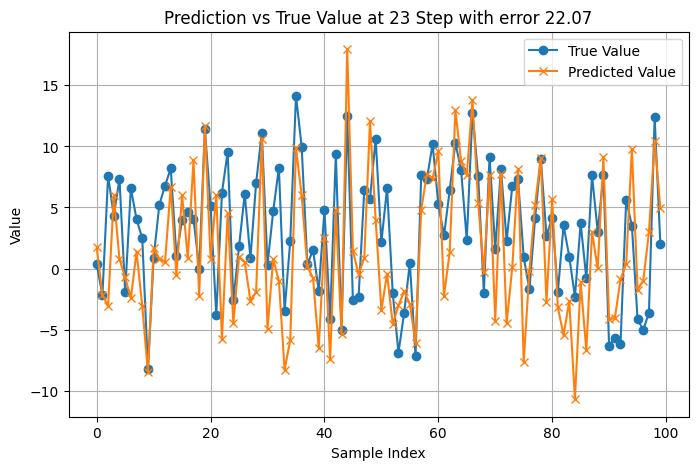

tensor(3.2049, dtype=torch.float64)


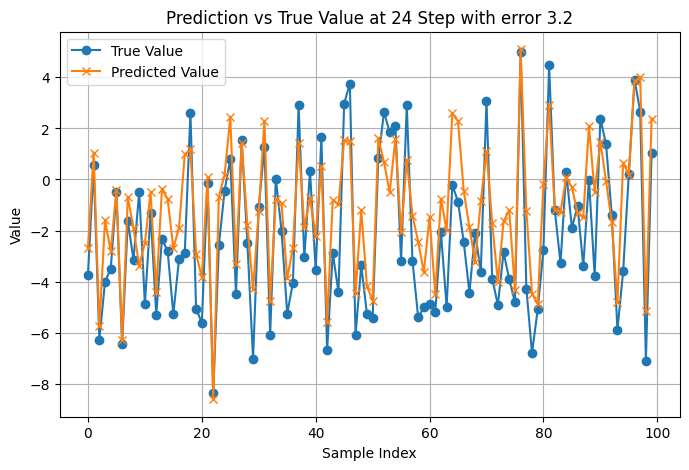

tensor(5.1869, dtype=torch.float64)


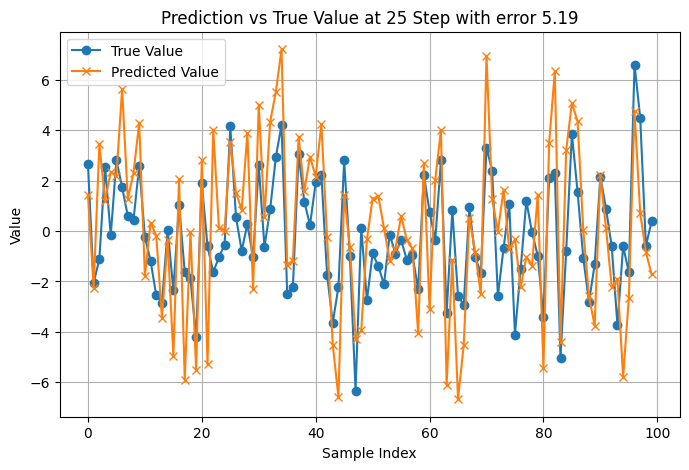

tensor(30.8554, dtype=torch.float64)


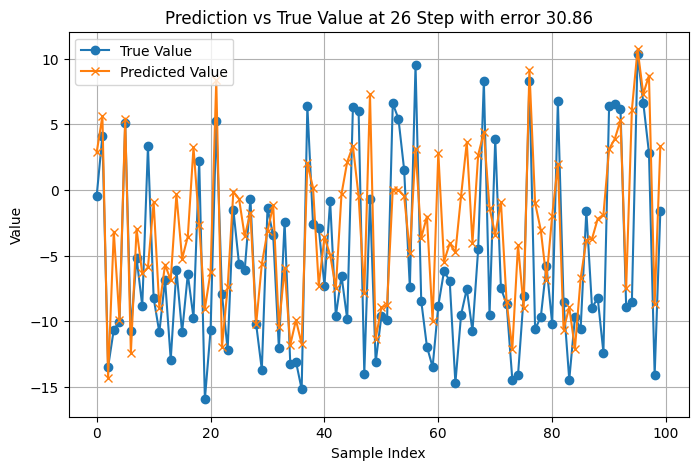

tensor(1.3647, dtype=torch.float64)


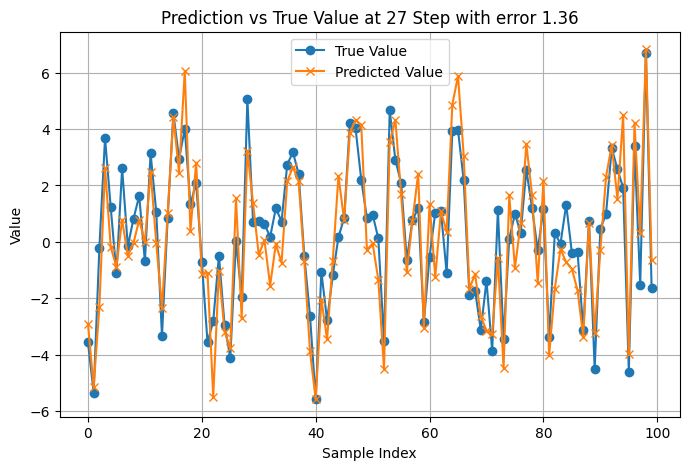

tensor(9.0990, dtype=torch.float64)


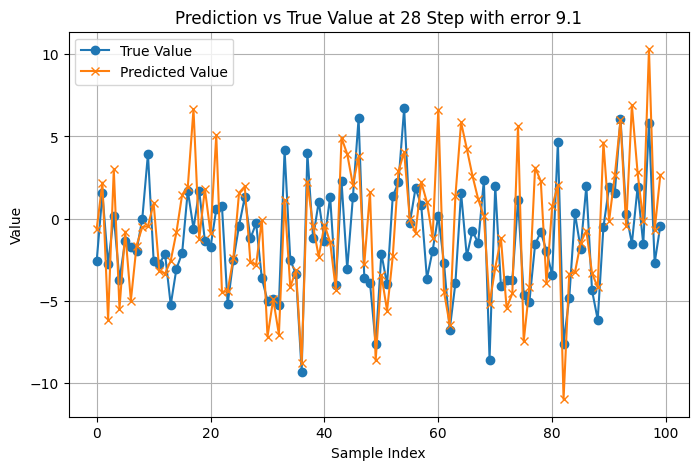

tensor(39.9290, dtype=torch.float64)


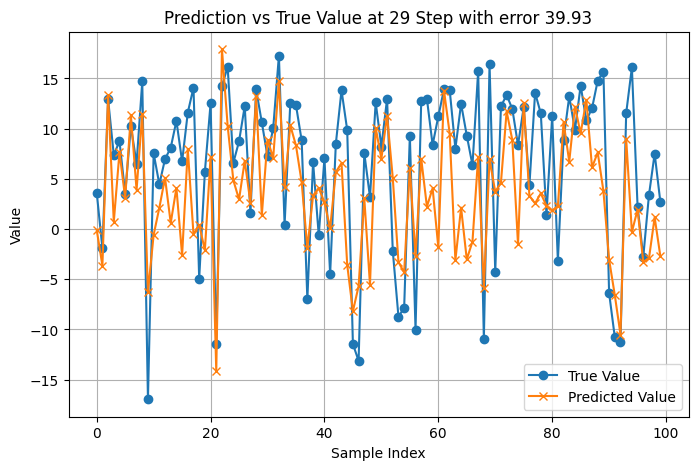

In [11]:
for i in range(data.shape[1]):
    y_pred = pred['pred.value'][:, i]
    y_true = data[:, i]

    tmp = F.mse_loss(y_pred, y_true)
    print(tmp)

    plt.figure(figsize=(8,5))
    plt.plot(y_true, label='True Value', marker='o')
    plt.plot(y_pred, label='Predicted Value', marker='x')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.title(f'Prediction vs True Value at {i} Step with error {round(tmp.item(), 2)}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
for i in range(data.shape[1]):
    y_pred = pred['pred.value'][:, i]
    y_true = data[:, i]

    tmp = F.mse_loss(y_pred, y_true)
    print(tmp.item())

7.976630690491274
12.011682054019918
8.008125196388
3.537305872094061
13.85287517245582
1.7858863230345474
9.88595373551301
30.04240291141295
27.072966018034094
0.2159766267210906
0.07526554426703919
5.888799360020098
12.598720596203336
11.493243837056673
37.75338879253964
1.7491903003901341
4.247365172798322
6.647643395343713
4.336457757986315
5.514908242911836
23.49367982859997
5.361282726972837
10.363990393602679
22.065062235030044
3.2049127133402013
5.186910567760872
30.855432057964943
1.3647053213196103
9.099034791364385
39.92896429395112


### Compare with r result

```r
> temp # r residual result
 [1]  7.9766306122139898 12.0116817669945561  8.0081251964859330  3.5373058520311229 13.8528751726772583
 [6]  1.7858863206045086  9.8859536589469261 30.0424029115677840 27.0729660181976612  0.2159766252862333
[11]  0.0752655442993194  5.8887993596240475 12.5987205947255649 11.4932438517303979 37.7533887912337889
[16]  1.7491903038108714  4.2473651696074111  6.6476433759056297  4.3364578111025098  5.5149082237930296
[21] 23.4936795233438822  5.3612826806645080 10.3639904061309522 22.0650623239508086  3.2049127751009370
[26]  5.1869105672897371 30.8554320276935812  1.3647053212213505  9.0990348107428840 39.9289638829070839
```

經過確認，R 與 Python 的結果是大致一致的。
全時間點與各時間點的 MSE ，與 R 的結果皆相差不大，精準度介於小數點後6位元至10位元。

## Test on unknown locations
### Split data into train and test

In [13]:
## split data into train and test
train_data = data[:70, :]
test_data = data[70:, :]
train_locs = locs[:70, :]
test_locs = locs[70:, :]

## training on train data
model = AutoFRK()
model.forward(
    data=train_data,
    loc=train_locs
)

## predict on test data
pred = model.predict(
    newloc = test_locs
)
F.mse_loss(pred['pred.value'], test_data).item()
for i in range(test_data.shape[1]):
    y_pred = pred['pred.value'][:, i]
    y_true = test_data[:, i]

    tmp = F.mse_loss(y_pred, y_true)
    print(tmp.item())

2025-10-18 11:17:03 - autoFRK.utils.logger - WARNING: Parameter "device" was not set. Value "cpu" detected and used.
2025-10-18 11:17:03 - autoFRK.utils.logger - INFO: Successfully using device "cpu".
2025-10-18 11:17:03 - autoFRK.utils.logger - INFO: Successfully using device "cpu".


11.439409079585287
25.10777820357771
27.450073362668796
11.824834286936635
14.635019971913705
9.478019546169245
13.727797091406785
12.172436127943978
17.848309463159406
11.414195374571046
16.19007356315722
12.385319823356673
10.433204073102166
41.77850738538855
38.01213743806002
27.143946178931465
9.501057895093087
18.93831935008747
17.35661541690054
19.45070120264184
15.18002877334346
17.513520195600503
15.105158832614269
35.53883357064767
21.326198297842993
9.02735323464993
30.130724206658495
19.64006772242395
12.26785218604056
24.641093149255067


In [14]:
model.obj["G"]["BBBH"].shape

torch.Size([3, 70])

In [15]:
def p(obj):
    """
    遞迴漂亮印出 dict / list / tensor。
    tensor 會換行縮排對齊，方便查看。
    """
    def pretty_tensor(tensor: torch.Tensor, indent: int = 6) -> str:
        lines = str(tensor).split("\n")
        if len(lines) == 1:
            return f"{lines[0]}"
        ind = " " * indent
        return "\n" + "\n".join(ind + line for line in lines) + "\n" + " " * (indent - 2)

    def _p(obj, indent=0):
        space = " " * indent
        if isinstance(obj, dict):
            print(space + "{")
            for k, v in obj.items():
                print(f"{space}  {repr(k)}: ", end="")
                _p(v, indent + 4)
            print(space + "}")
        elif isinstance(obj, list) or isinstance(obj, tuple):
            print(space + "[")
            for v in obj:
                _p(v, indent + 4)
            print(space + "]")
        elif isinstance(obj, torch.Tensor):
            print(pretty_tensor(obj, indent + 4))
        else:
            print(repr(obj))

    _p(obj)

In [16]:
p(model.obj)

{
  'M': 
        tensor([[ 7.4083e+00,  5.0502e+00, -4.6245e+00,  ...,  1.1290e-01,
                 -1.7461e-01,  2.7287e-02],
                [ 5.0502e+00,  3.5807e+00, -3.1372e+00,  ...,  6.7261e-02,
                 -1.3212e-01,  3.3018e-02],
                [-4.6245e+00, -3.1372e+00,  2.9967e+00,  ..., -6.9033e-02,
                  1.0587e-01, -2.9675e-02],
                ...,
                [ 1.1290e-01,  6.7261e-02, -6.9033e-02,  ...,  7.3610e-02,
                  2.2186e-03, -8.5966e-03],
                [-1.7461e-01, -1.3212e-01,  1.0587e-01,  ...,  2.2186e-03,
                  6.4279e-02, -2.0955e-02],
                [ 2.7287e-02,  3.3018e-02, -2.9675e-02,  ..., -8.5966e-03,
                 -2.0955e-02,  6.3067e-02]], dtype=torch.float64)
      
  's': tensor(0.1638, dtype=torch.float64)
  'negloglik': tensor(6050.8934, dtype=torch.float64)
  'w': 
        tensor([[-1.5804, -2.0356, -0.2991,  ...,  0.3220, -0.5290,  2.9805],
                [-0.9774, -1.4792, -0.0891,

### Compare with r result